In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
#Create a set of randon latitude and longitude values
lats = np.random.uniform(low= -90, high = 90, size = 1500)
longs = np.random.uniform(low = -180 , high = 180, size = 1500)
lat_lngs = zip(lats,longs)
lat_lngs

In [3]:

coordinates = list(lat_lngs)
coordinates

[(63.49751104461228, 116.98809990868006),
 (28.742587988439865, 141.6284571719371),
 (34.95089436811787, -85.86524251139573),
 (24.345368152300935, -76.4613011787891),
 (77.00138331757324, 11.87920128016583),
 (-4.14266420747488, 150.74657980208508),
 (19.246324527503077, 86.99155582786705),
 (44.647771277690254, 146.86777560773703),
 (-40.849463895206554, -93.31099032641298),
 (-11.20570177706415, -35.55457442687171),
 (-5.463714434893959, 5.691432894349759),
 (-75.40963613747617, 0.6861317647502858),
 (75.989759156932, 163.36284380406272),
 (70.7216006710832, -160.893127127724),
 (31.527064229467896, 20.8555500823893),
 (-28.8656217554517, -30.545517911432086),
 (-80.82870493947763, -68.24579084090753),
 (-36.16653951029066, 156.50244370488912),
 (16.452387170736174, 82.09894168141818),
 (10.286843881623724, 107.13094498346214),
 (-48.62299268643054, -11.323345269989431),
 (-37.359431088069066, -48.70930177661862),
 (-10.817706280850402, -26.663043618126352),
 (-7.632803372307293, 12

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


598

In [7]:
import requests
from config import weather_api_key

In [9]:
query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" +weather_api_key

In [10]:
import time
from datetime import datetime

In [18]:
#Create a list to hold the data 
city_data= []

#Print the beginning of the logging 
print('Beginning data retrieval')
print('-----------------------')

#Create counters
record_count=1
set_count=1


#Loop through all the cities in our list 
for i, city in enumerate(cities):
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    #Create endpoint url for each city 
    city_url=query_url + '&q='+city.replace(" ","+")
    
   #Log the URL, record ,and set numbers and city.
    print(f"Processing Record{record_count}of Set{set_count}|{city}")
   #Add 1 to the record count
    record_count +=1
          
#Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data 
          city_weather = requests.get(city_url).json()
        #Parse the data needed 
          city_lat= city_weather['coord']['lat']
          city_lng= city_weather['coord']['lon']
          city_max_temp= city_weather['main']['temp_max']
          city_humidity= city_weather['main']['humidity']
          city_clouds= city_weather['clouds']['all']
          city_wind= city_weather['wind']['speed']
          city_country= city_weather['sys']['country']
          #Convert the date to ISO standard
          city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
          #Append the city information into the city_data list
          city_data.append({"City":city.title(),
                            "Lat" : city_lat,
                            "Lng":city_lng,
                           "Max Temp":city_max_temp,
                            "Humidity":city_humidity,
                           "Cloudiness":city_clouds,
                           "Wind Speed":city_wind,
                           "Country":city_country,
                           "Date":city_date})

# If an error is experienced , skip the city
    except:
          print("City not found, skipping..")
    pass
          
#Indicate the data loading is complete 
print("------------------")
print ("Data Retrieval Complete")
print("------------------")

Beginning data retrieval
-----------------------
Processing Record1of Set1|nyurba
Processing Record2of Set1|tateyama
Processing Record3of Set1|scottsboro
Processing Record4of Set1|rock sound
Processing Record5of Set1|barentsburg
City not found, skipping..
Processing Record6of Set1|rabaul
Processing Record7of Set1|paradwip
City not found, skipping..
Processing Record8of Set1|otradnoye
Processing Record9of Set1|ancud
Processing Record10of Set1|piacabucu
Processing Record11of Set1|gamba
Processing Record12of Set1|hermanus
Processing Record13of Set1|cherskiy
Processing Record14of Set1|barrow
Processing Record15of Set1|suluq
Processing Record16of Set1|sao joao da barra
Processing Record17of Set1|ushuaia
Processing Record18of Set1|nelson bay
Processing Record19of Set1|amalapuram
Processing Record20of Set1|vung tau
Processing Record21of Set1|jamestown
Processing Record22of Set1|chuy
Processing Record23of Set1|olinda
Processing Record24of Set1|atambua
Processing Record25of Set1|kadykchan
City 

Processing Record13of Set5|peniche
Processing Record14of Set5|svarstad
Processing Record15of Set5|baykit
Processing Record16of Set5|luau
Processing Record17of Set5|narsaq
Processing Record18of Set5|fuyu
Processing Record19of Set5|lerwick
Processing Record20of Set5|ahipara
Processing Record21of Set5|batticaloa
Processing Record22of Set5|sola
Processing Record23of Set5|bonavista
Processing Record24of Set5|san patricio
Processing Record25of Set5|yellowknife
Processing Record26of Set5|karwar
Processing Record27of Set5|fasa
Processing Record28of Set5|kabompo
Processing Record29of Set5|pevek
Processing Record30of Set5|vardo
Processing Record31of Set5|djambala
Processing Record32of Set5|palauig
Processing Record33of Set5|villamontes
Processing Record34of Set5|chazuta
Processing Record35of Set5|tazovskiy
Processing Record36of Set5|avarua
Processing Record37of Set5|haines junction
Processing Record38of Set5|silver city
Processing Record39of Set5|dingle
Processing Record40of Set5|ajdabiya
Proces

Processing Record27of Set9|zihuatanejo
Processing Record28of Set9|jacareacanga
Processing Record29of Set9|tadine
Processing Record30of Set9|tura
Processing Record31of Set9|honningsvag
Processing Record32of Set9|shawnee
Processing Record33of Set9|ondorhaan
City not found, skipping..
Processing Record34of Set9|kalaleh
Processing Record35of Set9|brae
Processing Record36of Set9|phangnga
Processing Record37of Set9|ponnani
Processing Record38of Set9|san joaquin
Processing Record39of Set9|bama
Processing Record40of Set9|lagawe
Processing Record41of Set9|campoverde
Processing Record42of Set9|terrace
Processing Record43of Set9|asfi
Processing Record44of Set9|faya
Processing Record45of Set9|sioux lookout
Processing Record46of Set9|lucapa
Processing Record47of Set9|svarychiv
Processing Record48of Set9|ostrovnoy
Processing Record49of Set9|coahuayana
Processing Record50of Set9|ismailia
Processing Record1of Set10|mabaruma
Processing Record2of Set10|quatre cocos
Processing Record3of Set10|sovkhoznyy


In [19]:
print(len(city_data))

555


In [20]:
#Convert the array to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nyurba,63.2842,118.3319,-20.31,96,100,2.17,RU,2021-12-02 00:43:11
1,Tateyama,34.9833,139.8667,57.09,47,1,11.79,JP,2021-12-02 00:43:11
2,Scottsboro,34.6723,-86.0341,58.26,66,90,3.44,US,2021-12-02 00:43:13
3,Rock Sound,24.9000,-76.2000,77.76,67,6,12.33,BS,2021-12-02 00:43:13
4,Rabaul,-4.1967,152.1721,83.73,73,99,6.40,PG,2021-12-02 00:43:13
5,Otradnoye,59.7775,30.8181,21.25,99,91,3.20,RU,2021-12-02 00:43:14
6,Ancud,-41.8697,-73.8203,51.33,74,100,5.88,CL,2021-12-02 00:43:15
7,Piacabucu,-10.4056,-36.4344,78.51,81,86,13.13,BR,2021-12-02 00:43:15
8,Gamba,-2.6500,10.0000,76.46,92,100,4.52,GA,2021-12-02 00:43:15
9,Hermanus,-34.4187,19.2345,59.90,75,100,10.98,ZA,2021-12-02 00:43:16


In [29]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nyurba,RU,2021-12-02 00:43:11,63.2842,118.3319,-20.31,96,100,2.17
1,Tateyama,JP,2021-12-02 00:43:11,34.9833,139.8667,57.09,47,1,11.79
2,Scottsboro,US,2021-12-02 00:43:13,34.6723,-86.0341,58.26,66,90,3.44
3,Rock Sound,BS,2021-12-02 00:43:13,24.9000,-76.2000,77.76,67,6,12.33
4,Rabaul,PG,2021-12-02 00:43:13,-4.1967,152.1721,83.73,73,99,6.40
5,Otradnoye,RU,2021-12-02 00:43:14,59.7775,30.8181,21.25,99,91,3.20
6,Ancud,CL,2021-12-02 00:43:15,-41.8697,-73.8203,51.33,74,100,5.88
7,Piacabucu,BR,2021-12-02 00:43:15,-10.4056,-36.4344,78.51,81,86,13.13
8,Gamba,GA,2021-12-02 00:43:15,-2.6500,10.0000,76.46,92,100,4.52
9,Hermanus,ZA,2021-12-02 00:43:16,-34.4187,19.2345,59.90,75,100,10.98


In [30]:
#Create the output data file 

output_file= "weather_data/cities.csv"

#Export the city data into a CSV
city_data_df.to_csv(output_file,index_label="City_ID")

In [32]:
#Extract relevant fields from the df for plotting 
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df["Wind Speed"]

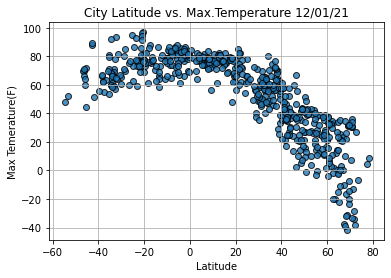

In [39]:
#Build scatter plot for latitude vs max.temp
plt.scatter(lats,max_temps,edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Cities")
#Add the other properties
plt.title(f'City Latitude vs. Max.Temperature '+time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Max Temerature(F)')
plt.grid(True)

#save the image
plt.savefig('weather_data/fig1.png')

plt.show()

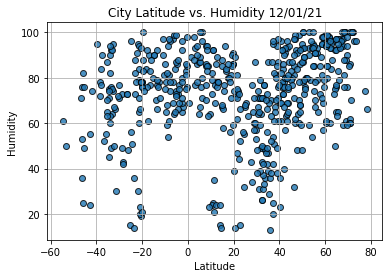

In [40]:
#Build scatter plot for latitude vs humidity
plt.scatter(lats,humidity,edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Cities")
#Add the other properties
plt.title(f'City Latitude vs. Humidity '+time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

#save the image
plt.savefig('weather_data/fig2.png')

plt.show()

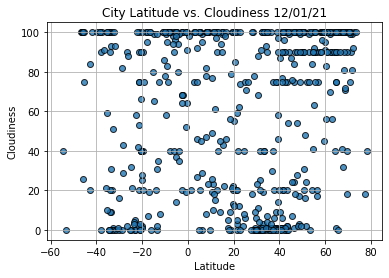

In [41]:
#Build scatter plot for latitude vs cloudiness
plt.scatter(lats,cloudiness,edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Cities")
#Add the other properties
plt.title(f'City Latitude vs. Cloudiness '+time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

#save the image
plt.savefig('weather_data/fig3.png')

plt.show()

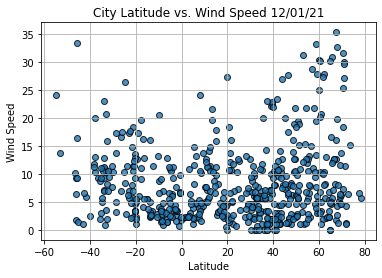

In [42]:
#Build scatter plot for latitude vs wind speed
plt.scatter(lats,wind_speed,edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Cities")
#Add the other properties
plt.title(f'City Latitude vs. Wind Speed '+time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

#save the image
plt.savefig('weather_data/fig4.png')

plt.show()

In [43]:
#Import linregress
from scipy.stats import linregress

#Create a function to perform linear regression on the weather data 
#and plot a regression line and the equation with the data
def plot_linear_regression(x_values,y_values,title,y_label,text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [47]:
#Create northern and southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>= 0)]
northern_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nyurba,RU,2021-12-02 00:43:11,63.2842,118.3319,-20.31,96,100,2.17
1,Tateyama,JP,2021-12-02 00:43:11,34.9833,139.8667,57.09,47,1,11.79
2,Scottsboro,US,2021-12-02 00:43:13,34.6723,-86.0341,58.26,66,90,3.44
3,Rock Sound,BS,2021-12-02 00:43:13,24.9000,-76.2000,77.76,67,6,12.33
5,Otradnoye,RU,2021-12-02 00:43:14,59.7775,30.8181,21.25,99,91,3.20
10,Cherskiy,RU,2021-12-02 00:43:16,68.7500,161.3000,-31.32,100,71,5.17
11,Barrow,US,2021-12-02 00:43:16,71.2906,-156.7887,-12.98,70,90,11.50
12,Suluq,LY,2021-12-02 00:43:17,31.6682,20.2521,58.32,71,0,6.08
16,Amalapuram,IN,2021-12-02 00:43:18,16.5833,82.0167,77.38,83,46,4.85
17,Vung Tau,VN,2021-12-02 00:41:15,10.3460,107.0843,76.21,82,19,5.01


In [48]:
southern_hemi_df= city_data_df[(city_data_df['Lat']< 0)]
southern_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Rabaul,PG,2021-12-02 00:43:13,-4.1967,152.1721,83.73,73,99,6.40
6,Ancud,CL,2021-12-02 00:43:15,-41.8697,-73.8203,51.33,74,100,5.88
7,Piacabucu,BR,2021-12-02 00:43:15,-10.4056,-36.4344,78.51,81,86,13.13
8,Gamba,GA,2021-12-02 00:43:15,-2.6500,10.0000,76.46,92,100,4.52
9,Hermanus,ZA,2021-12-02 00:43:16,-34.4187,19.2345,59.90,75,100,10.98
13,Sao Joao Da Barra,BR,2021-12-02 00:43:17,-21.6403,-41.0511,72.43,95,2,8.01
14,Ushuaia,AR,2021-12-02 00:42:53,-54.8000,-68.3000,47.86,61,40,24.16
15,Nelson Bay,AU,2021-12-02 00:43:18,-32.7167,152.1500,77.95,74,1,8.14
19,Chuy,UY,2021-12-02 00:43:19,-33.6971,-53.4616,58.78,76,9,7.09
20,Olinda,BR,2021-12-02 00:43:19,-8.0089,-34.8553,82.13,74,40,6.91


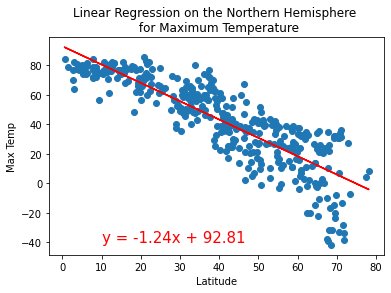

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(10,-40))


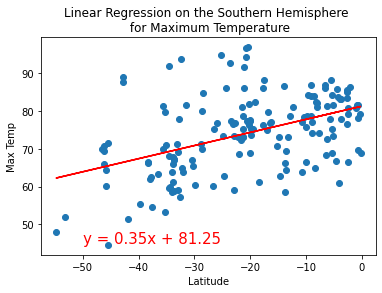

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,45))



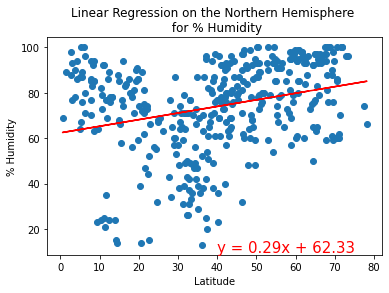

In [58]:
# Linear regression for % Humidity on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

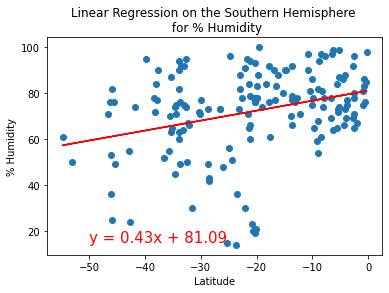

In [61]:
# Linear regression for %Humidity on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

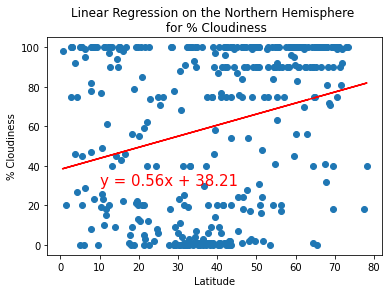

In [65]:
# Linear regression for % Cloudiness on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,30))

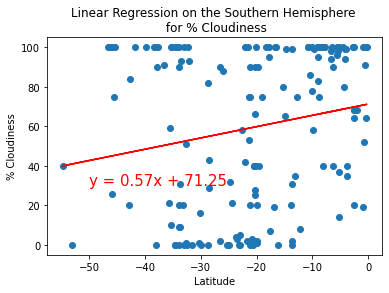

In [67]:
# Linear regression for % Cloudiness on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,30))

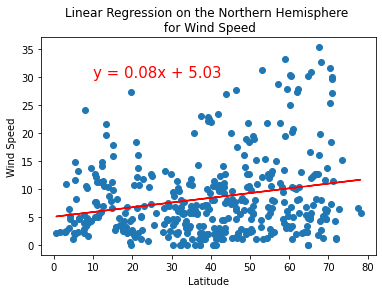

In [68]:
# Linear regression for Wind Speed  on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,30))

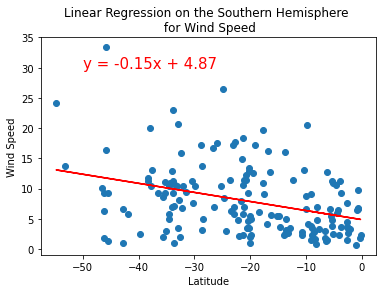

In [69]:
# Linear regression for Wind Speed on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,30))